# Analisis

En este notebook analizamos los resultados de los experimentos

In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from typing import Dict

In [73]:
# Leemos los resultados para luego analizar cada dataset/experimento
df_results = pd.read_csv("resultados.csv")

In [59]:
# instancias/control/n_19-i_1.in

def parse_instance(filename: str) -> Dict[str, str]:
    instance = filename.split('/')[2]
    # -3 por el ''.in'
    pairs = instance[:-3].split('-')
    
    attrs = {}
    for pair in pairs:
        k, v = pair.split('_')
        attrs[k] = v
    
    return attrs

def generate_attrs(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    attrs = parse_filename(df["instance"].iloc[0])
    for k in attrs.keys():
        df[k] = df["instance"].map(lambda r: int(parse_instance(r)[k]))
    
    return df
    

### Complejidad BT-F

keys: dict_keys(['n', 'i'])


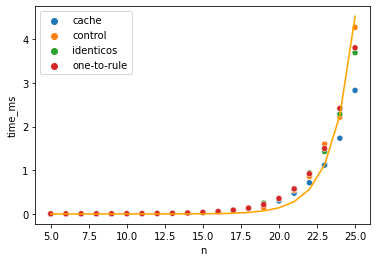

In [195]:
df = generate_attrs(df_results[(df_results["algorithm"] == "BT-F") & (df_results["dataset"] != "low-M")])
df["complejidad"] = (2.0 ** df["n"]) * 0.000000135 # Exponencial
g = df.groupby(["dataset", "n"]).mean()
sns.scatterplot(data=g, x="n", y="time_ms", hue="dataset")
fig = sns.lineplot(data=g, x='n', y='complejidad', color="orange")

Índice de correlación de Pearson: 0.9621436042503788


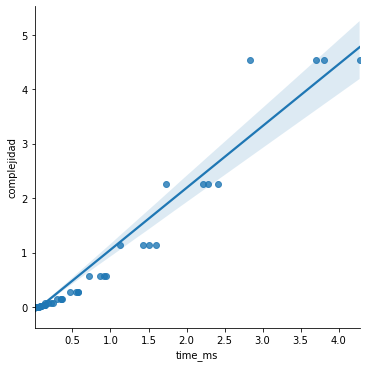

In [196]:
fig = sns.lmplot(data=g, x="time_ms", y="complejidad");
# pirson
print("Índice de correlación de Pearson:", correlacion_pearson(df, "time_ms", "complejidad"));

### Complejidad BT-O-C

keys: dict_keys(['n', 'i'])


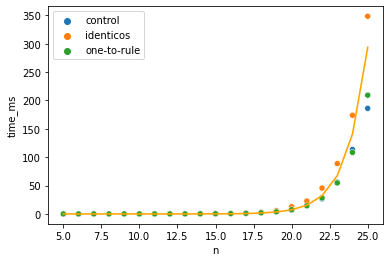

In [168]:
df = generate_attrs(df_results[df_results["algorithm"] == "BT-O-C"])
df["complejidad"] = (2.0 ** df["n"]) * df["n"]* 0.00000035 # Exponencial
g = df.groupby(["dataset", "n"]).mean()
sns.scatterplot(data=g, x="n", y="time_ms", hue="dataset")
fig = sns.lineplot(data=g, x='n', y='complejidad', color="orange")

Índice de correlación de Pearson: 0.9597843765127868


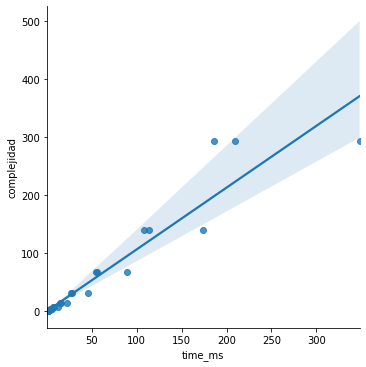

In [169]:
fig = sns.lmplot(data=g, x="time_ms", y="complejidad");
print("Índice de correlación de Pearson:", correlacion_pearson(df, "time_ms", "complejidad"));

### Complejidad BT-O-G

In [149]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

keys: dict_keys(['n', 'i'])


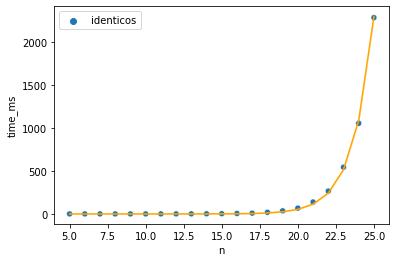

In [150]:
df = generate_attrs(df_results[(df_results["algorithm"] == "BT-O-G") & (df_results["dataset"] == "identicos")])
g = df.groupby(["dataset", "n"]).mean()
sns.scatterplot(data=g, x="n", y="time_ms", hue="dataset")

df["complejidad"] = (2.0 ** df["n"]) * (np.log(df["n"]) * df["n"]) * 0.00000085 # Exponencial
fig = sns.lineplot(data=df, x='n', y='complejidad', color="orange")

Índice de correlación de Pearson: 0.9954131607948057


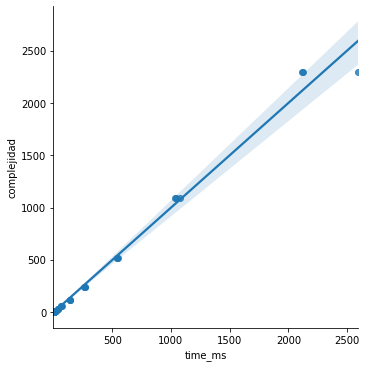

In [148]:
fig = sns.lmplot(data=df, x="time_ms", y="complejidad");
print("Índice de correlación de Pearson:", correlacion_pearson(df, "time_ms", "complejidad"));

### Complejidad FB

keys: dict_keys(['n', 'i'])


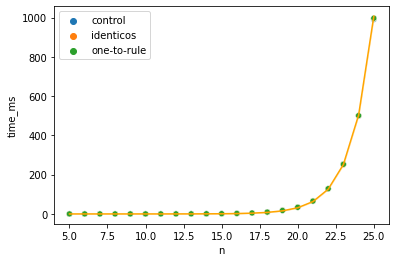

In [126]:
df = generate_attrs(df_results[df_results["algorithm"] == "FB"])
g = df.groupby(["dataset", "n"]).mean()
sns.scatterplot(data=g, x="n", y="time_ms", hue="dataset")

df["complejidad"] = (2.0 ** df["n"]) * 0.00003 # Exponencial
fig = sns.lineplot(data=df, x='n', y='complejidad', color="orange")

Índice de correlación de Pearson: 0.9999373755392265


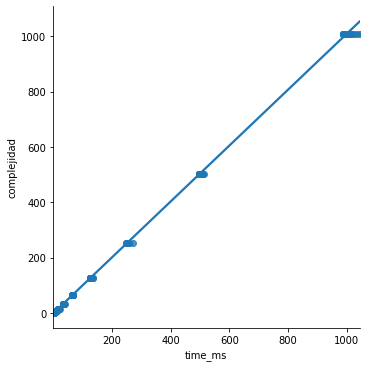

In [127]:
fig = sns.lmplot(data=df, x="time_ms", y="complejidad");
print("Índice de correlación de Pearson:", correlacion_pearson(df, "time_ms", "complejidad"));

### Complejidad DP

In [6]:
df_results = df[df["dataset"] == "complejidad-DP"]
df_results["m"] = df_results["instance"].map(lambda r: int(r.split("/")[2].split('-')[0]))
df_results["n"] = df_results["instance"].map(lambda r: int(r.split("/")[2].split('-')[1]))
df_results

,Unnamed: 0,dataset,algorithm,time_ms,instance,m,n


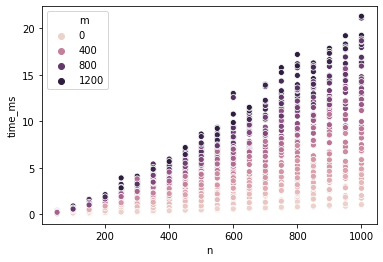

In [15]:
import seaborn as sns

sns.scatterplot(data=df_results, x="n", y="time_ms", hue="m")

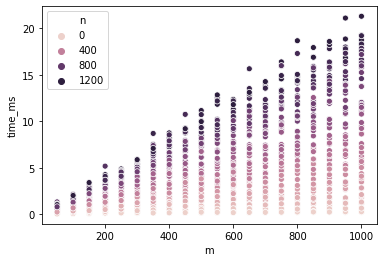

In [16]:
sns.scatterplot(data=df_results, x="m", y="time_ms", hue="n")

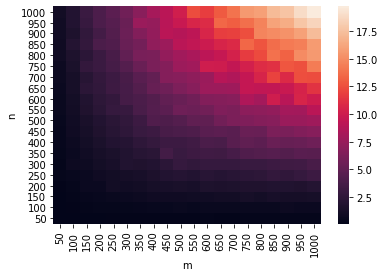

In [24]:
df = df_results.pivot_table(values="time_ms", index=["n"], columns=["m"], aggfunc=np.mean)

ax = sns.heatmap(data=df)
ax.invert_yaxis()

In [25]:
df_results["complejidad"] = df_results["n"]*df_results["m"]
df_results

,dataset,algorithm,time_ms,instance,m,n,complejidad
0,sinNombre,DP,0.782550,instancias/sinNombre/150-200-1.in,150,200,30000
1,sinNombre,DP,3.029480,instancias/sinNombre/150-650-1.in,150,650,97500
2,sinNombre,DP,2.967140,instancias/sinNombre/150-850-0.in,150,850,127500
3,sinNombre,DP,0.304782,instancias/sinNombre/800-50-1.in,800,50,40000
4,sinNombre,DP,2.987050,instancias/sinNombre/600-300-1.in,600,300,180000
...,...,...,...,...,...,...,...
1195,sinNombre,DP,0.818864,instancias/sinNombre/50-800-0.in,50,800,40000
1196,sinNombre,DP,9.867730,instancias/sinNombre/1000-600-0.in,1000,600,600000
1197,sinNombre,DP,2.850830,instancias/sinNombre/1000-250-0.in,1000,250,250000
1198,sinNombre,DP,15.960000,instancias/sinNombre/1000-800-1.in,1000,800,800000


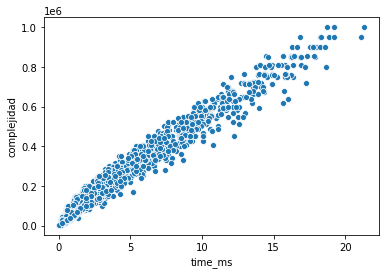

In [26]:
sns.scatterplot(data=df_results, y="complejidad", x="time_ms")